# FindOut cheated customer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pylab import bone,pcolor,colorbar,plot,show
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from minisom import MiniSom

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

Using TensorFlow backend.


In [26]:
df=pd.read_csv("Credit_Card_Applications.csv")

In [28]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [29]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [30]:
# Use Self Organize Maps
som=MiniSom(10,10,15,sigma=1,learning_rate=0.5)

In [31]:
som.random_weights_init(X)
som.train_random(X,100) # random_selection_training, so each iterations is differnet

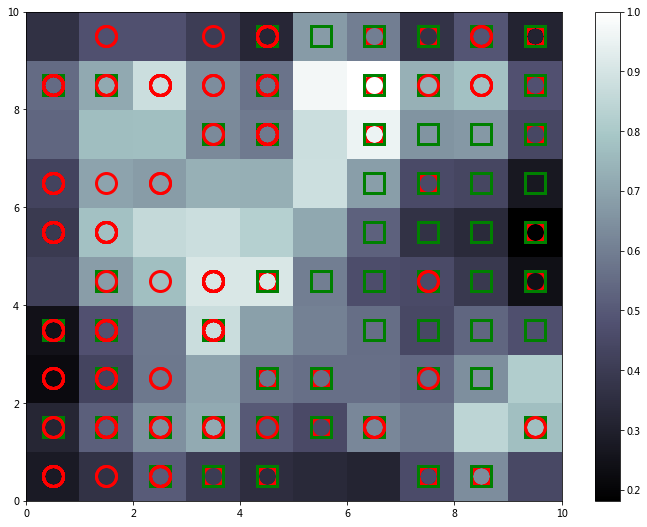

In [32]:
# show distance each Mean Intermediate neuron
plt.figure(figsize=(12,9))
bone()
pcolor(som.distance_map().T)
colorbar()
marker=["o",'s']
colors=['red','green']

for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,w[1]+0.5,marker[y[i]],markeredgecolor=colors[y[i]],markerfacecolor="None",markersize=20,markeredgewidth=3)

In [33]:
mappings = som.win_map(X)

In [43]:
# selected exceptional data(vector) from the neuron
frauds=np.concatenate((mappings[(6,7)],mappings[(6,8)]))

In [47]:
# to do inverse transform let the data transform back ( because we do MinMaxScaler for som algorithms (competetive learning) )
result=pd.DataFrame(scaler.inverse_transform((frauds)),columns=df.columns[:-1])

# Hybrid Unsupervised learning and Supervised Learning

In [62]:
# result is the suspicious customer list (we label this customer to 1 means cheated)
customers=df.iloc[:,1:].values 
train=np.concatenate((customers,np.where(df["CustomerID"].isin(result),1,0).reshape(-1,1)),axis=1)
columns=list(df.columns[1:])+["label"]
training=pd.DataFrame(train,columns=columns)

In [63]:
scaler=StandardScaler()
XX=scaler.fit_transform(training.iloc[:,:-1])
YY=training.iloc[:,-1]

In [64]:
# build ANN model
model=Sequential()
model.add(Dense(2,activation="relu",input_dim=15))
model.add(Dense(1,activation="sigmoid"))
model.compile("adam","binary_crossentropy",metrics=["accuracy"])

In [65]:
# 如果 dataset has few rows(observations) and columns(features) ， don't have too much eopchs
model.fit(XX,YY,batch_size=1,epochs=2)

Epoch 1/2
690/690 [==============================] - 1s 1ms/step - loss: 0.4090 - acc: 0.9058
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.2032 - acc: 0.9971


In [66]:
model.predict(XX)

array([[1.62754983e-01],
       [8.11900012e-03],
       [2.85432369e-01],
       [5.98414503e-02],
       [1.32301161e-02],
       [1.01621798e-03],
       [2.71607321e-02],
       [1.59127899e-02],
       [2.84615606e-01],
       [2.84615606e-01],
       [9.85281989e-02],
       [2.84615606e-01],
       [2.84615606e-01],
       [1.04917854e-01],
       [2.84615606e-01],
       [4.47917059e-02],
       [5.73668145e-02],
       [3.68372886e-04],
       [2.84615606e-01],
       [1.85690599e-03],
       [2.31029503e-02],
       [2.55502701e-01],
       [1.42115191e-01],
       [6.88414499e-02],
       [2.96120420e-02],
       [3.71965952e-02],
       [2.84615606e-01],
       [3.57711166e-01],
       [8.57434003e-04],
       [3.20609137e-02],
       [1.00818239e-01],
       [2.84615606e-01],
       [2.84615606e-01],
       [1.54446900e-01],
       [2.84615606e-01],
       [2.87524104e-01],
       [1.86850093e-02],
       [8.00844282e-02],
       [2.89866738e-02],
       [2.02066004e-01],


# Making prediction and evaluation model
- by probability/rank to show <b>who is the suspicious person</b>

In [67]:
pred = model.predict(XX)

In [68]:
rt=pd.DataFrame(pred)
rt["rank"]=rt[0].rank(ascending=False)

In [69]:
rt.head()

,0,rank
0,0.162755,260.0
1,0.008119,584.0
2,0.285432,26.0
3,0.059841,382.0
4,0.013230,545.0


In [70]:
final=pd.concat((df["CustomerID"],rt),axis=1)
final[0]=round(final[0],6)
final.rename({0:"Prob."},axis=1,inplace=True)

In [71]:
final.sort_values("Prob.",ascending=False)

,CustomerID,Prob.,rank
500,15790113,0.751274,1.0
149,15598802,0.447108,2.0
267,15762716,0.423752,3.0
240,15772329,0.373080,4.0
27,15588123,0.357711,5.0
202,15664615,0.331058,6.0
256,15632503,0.328565,7.0
413,15631693,0.315612,8.0
548,15617991,0.310870,9.0
363,15605872,0.308929,10.0
